# Comparing YOLOv4 and EfficientDet

This example compares the [YOLOv4](https://arxiv.org/abs/2004.10934) and [EfficientDet](https://arxiv.org/abs/1911.09070) object detection models on the [COCO dataset](https://cocodataset.org/#home) using FiftyOne.

For more information check out the [YOLOv4 blog post](https://medium.com/voxel51/fifteen-minutes-with-fiftyone-yolov4-180cf66923a9?source=friends_link&sk=71922580c58ef371fbbb80f7356a872d) and [EfficientDet blog post](https://medium.com/voxel51/fifteen-minutes-with-fiftyone-efficientdet-d84b60ffff28?source=friends_link&sk=cf3f54dc3b8544e45fc70c07ae0eea30).

## Load dataset

First, let's load the validation split of COCO-2017 from the [FiftyOne Dataset Zoo](https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/zoo.html):

In [1]:
import os

import fiftyone as fo
import fiftyone.zoo as foz

In [2]:
dataset = foz.load_zoo_dataset("coco-2017", split="validation")

Split 'validation' already downloaded
Loading 'coco-2017' split 'validation'
 100% |██████████████████████████| 5000/5000 [45.4s elapsed, 0s remaining, 106.6 samples/s]      


Next, let's add some pre-generated YOLOv4 and EfficientDet predictions to the dataset.

You can download the predictions from [this Google Drive link (72MB)](https://drive.google.com/file/d/1wJJy8F25ixPSfrXcYsZz6VJ3rtsVIck5).

In [ ]:
# Path to the downloaded JSON file
DATASET_PATH = "/path/to/yolo_edet_dataset.json"

In [5]:
# Load the predictions
additional_labels = fo.Dataset.from_json(dataset_path, name="additional_labels")

 100% |██████████████████████████| 5000/5000 [5.3m elapsed, 0s remaining, 17.2 samples/s]      


In [6]:
# Merge the predictions into the zoo dataset, keying on filename
dataset.merge_samples(additional_labels, key_field="filepath", key_fcn=lambda k: os.path.basename(k))

 100% |██████████████████████████| 5000/5000 [3.0m elapsed, 0s remaining, 31.3 samples/s]      


## Evaluate and explore

You can evaluate any of the predictions with respect to the ground truth labels.

For example, let's evaluate the YOLOv4 predictions:

In [7]:
import fiftyone.utils.eval as foue

In [9]:
foue.evaluate_detections(dataset, gt_field="ground_truth", pred_field="yolov4")

Evaluating detections...
 100% |██████████████████████████| 5000/5000 [3.2m elapsed, 0s remaining, 28.4 samples/s]      


In [10]:
# Visualize dataset in the App
session = fo.launch_app(dataset)

App launched


[With dataset views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html), you can easily identify samples of interest. For example, let's view the samples where YOLOv4 had the most false positives:

In [12]:
# Sort samples by their `fp_iou_0_75` field
session.view = dataset.sort_by("fp_iou_0_75", reverse=True)

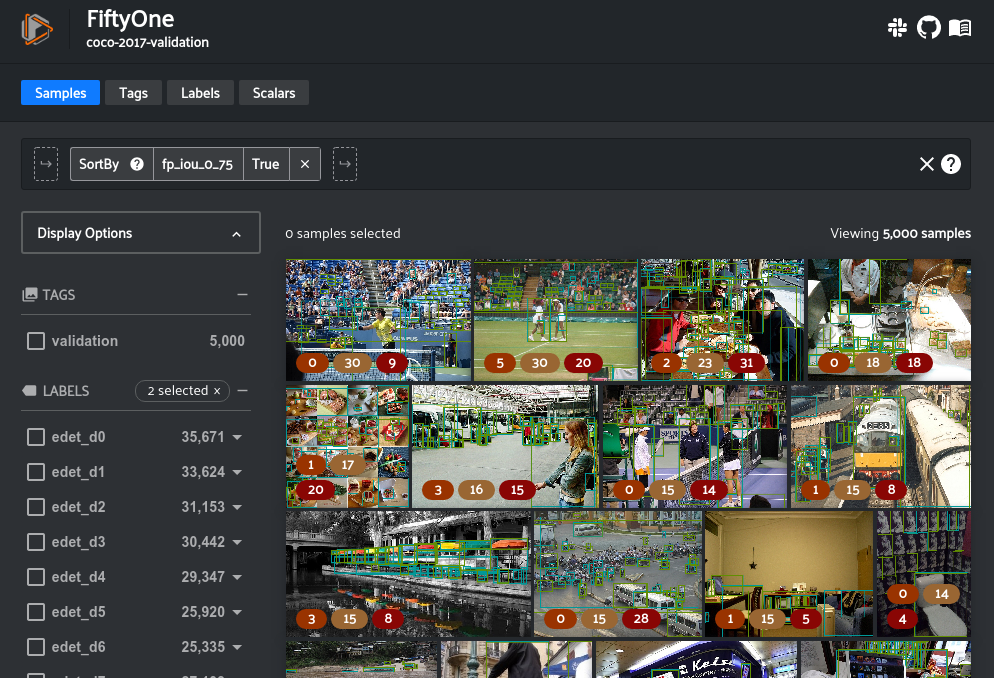
